## 1. Power transform

In [1]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

In [2]:
import  matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv("sample_dataset.csv").iloc[:,0:5].dropna()

In [7]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


<Axes: >

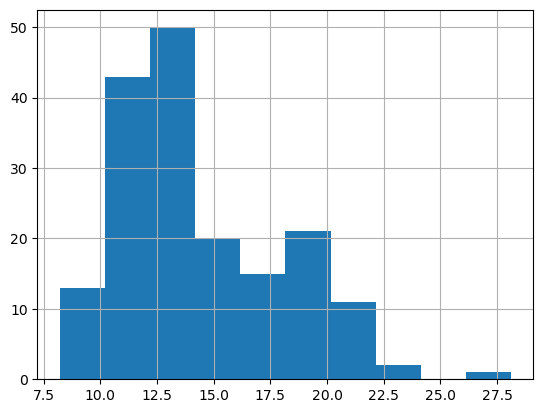

In [10]:
df['mean radius'].hist()

### 1.1 Yeo-Johnson power transform 

In [11]:
power = PowerTransformer()

In [12]:
t = power.fit_transform(df)

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([-2.54500995, -2.03906966, -1.53312936, -1.02718906, -0.52124877,
        -0.01530847,  0.49063182,  0.99657212,  1.50251242,  2.00845271,
         2.51439301]),
 <BarContainer object of 10 artists>)

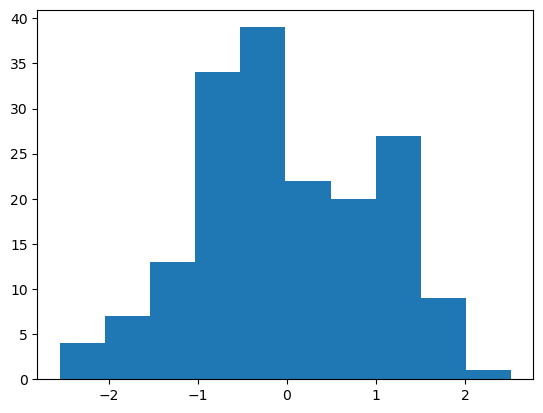

In [13]:
plt.hist(t[:,0])

With no standardization

In [17]:
power = PowerTransformer('yeo-johnson', standardize=False)

In [18]:
t = power.fit_transform(df)

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([1.15402499, 1.17204759, 1.19007019, 1.20809279, 1.22611538,
        1.24413798, 1.26216058, 1.28018318, 1.29820578, 1.31622838,
        1.33425098]),
 <BarContainer object of 10 artists>)

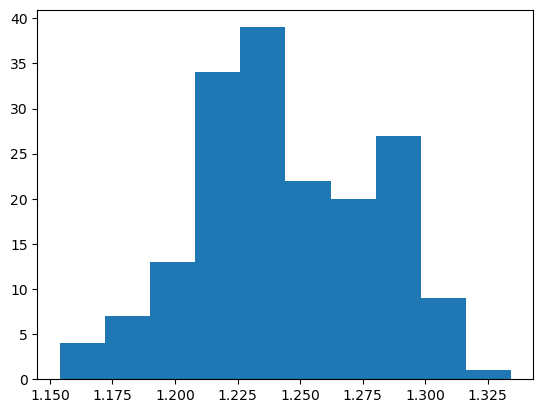

In [19]:
plt.hist(t[:,0])

### 1.2 Box-cox transformation

Only with positive features

In [20]:
power = PowerTransformer('box-cox')

In [21]:
t = power.fit_transform(df)

(array([ 4.,  7., 12., 34., 40., 22., 20., 28.,  8.,  1.]),
 array([-2.55704087, -2.04914834, -1.54125581, -1.03336328, -0.52547074,
        -0.01757821,  0.49031432,  0.99820685,  1.50609938,  2.01399191,
         2.52188444]),
 <BarContainer object of 10 artists>)

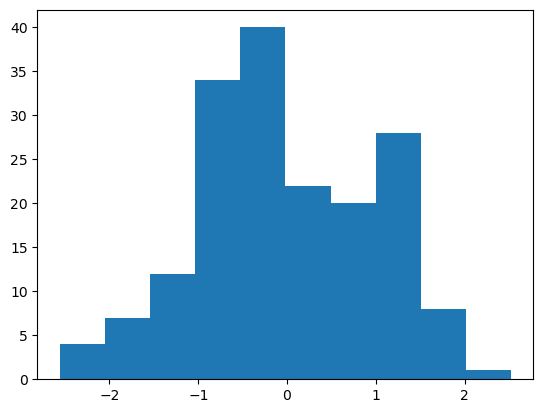

In [22]:
plt.hist(t[:,0])

<Axes: >

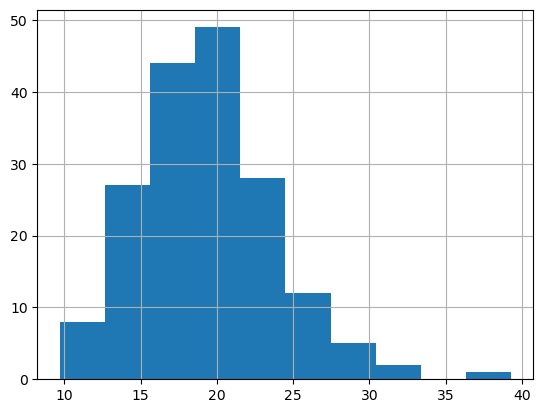

In [23]:
df['mean texture'].hist()

(array([ 2., 10., 20., 32., 37., 42., 20., 10.,  2.,  1.]),
 array([-2.81207169, -2.20309339, -1.59411509, -0.98513679, -0.37615849,
         0.23281981,  0.84179811,  1.4507764 ,  2.0597547 ,  2.668733  ,
         3.2777113 ]),
 <BarContainer object of 10 artists>)

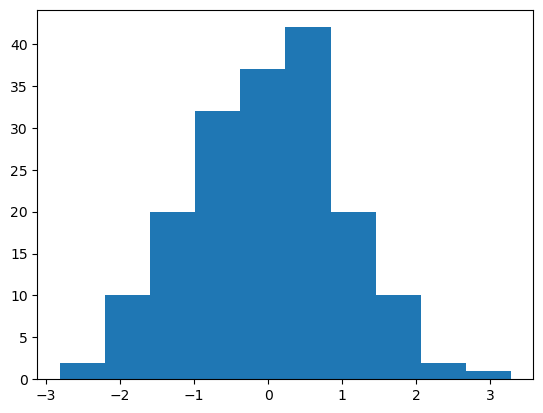

In [24]:
plt.hist(t[:,1])

## 2. Binning

In [25]:
from sklearn.preprocessing import  KBinsDiscretizer

In [26]:
import pandas as pd

### 2.1 Bins with uniform width  

In [27]:
binner = KBinsDiscretizer(strategy= 'uniform', n_bins = 5)

In [28]:
binner.fit_transform(df)

<176x25 sparse matrix of type '<class 'numpy.float64'>'
	with 880 stored elements in Compressed Sparse Row format>

In [29]:
binner = KBinsDiscretizer(strategy= 'uniform', n_bins = 5, encode = 'onehot-dense')
binner.fit_transform(df)

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
binner = KBinsDiscretizer(strategy= 'uniform', n_bins = 5, encode = 'ordinal')
binner.fit_transform(df)

array([[2., 1., 2., 2., 2.],
       [0., 1., 0., 0., 4.],
       [1., 2., 1., 0., 4.],
       [1., 2., 1., 1., 1.],
       [1., 2., 1., 0., 3.],
       [2., 2., 2., 2., 2.],
       [1., 1., 1., 0., 2.],
       [0., 0., 0., 0., 2.],
       [2., 1., 2., 1., 3.],
       [1., 1., 1., 0., 2.],
       [2., 2., 2., 1., 3.],
       [2., 2., 2., 2., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 2.],
       [2., 2., 2., 1., 1.],
       [1., 1., 1., 0., 2.],
       [2., 1., 2., 1., 2.],
       [0., 1., 0., 0., 1.],
       [2., 1., 2., 1., 3.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0.],
       [1., 2., 1., 0., 3.],
       [0., 1., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [1., 1., 1., 0., 2.],
       [1., 0., 1., 0., 4.],
       [3., 2., 3., 2., 4.],
       [0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 4.],
       [1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 3.],
       [2., 1., 2., 1., 2.],
       [2., 1., 2., 2., 1.],
       [1., 1.

## 2.2 Binning using quantiles

In [35]:
import numpy as np

In [31]:
binner = KBinsDiscretizer(strategy= 'quantile', n_bins = 5, encode = 'ordinal')

In [32]:
binner.fit_transform(df)

array([[4., 3., 4., 4., 4.],
       [0., 3., 1., 0., 4.],
       [2., 3., 2., 2., 4.],
       [3., 4., 3., 3., 0.],
       [2., 4., 3., 2., 4.],
       [4., 3., 4., 4., 2.],
       [2., 1., 2., 2., 3.],
       [0., 0., 0., 0., 3.],
       [3., 1., 3., 3., 4.],
       [3., 3., 3., 3., 3.],
       [3., 4., 3., 3., 4.],
       [4., 4., 4., 4., 2.],
       [2., 2., 2., 2., 1.],
       [2., 3., 2., 2., 3.],
       [4., 4., 4., 4., 1.],
       [2., 3., 2., 2., 3.],
       [4., 1., 4., 4., 4.],
       [1., 2., 1., 1., 0.],
       [4., 2., 4., 4., 4.],
       [2., 2., 2., 2., 0.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0.],
       [1., 4., 2., 1., 4.],
       [0., 1., 0., 0., 3.],
       [0., 0., 0., 0., 2.],
       [2., 1., 2., 2., 3.],
       [2., 0., 2., 2., 4.],
       [4., 4., 4., 4., 4.],
       [0., 2., 0., 0., 2.],
       [2., 0., 2., 2., 4.],
       [3., 2., 3., 3., 0.],
       [0., 3., 0., 0., 4.],
       [4., 1., 4., 4., 3.],
       [4., 2., 4., 4., 0.],
       [3., 1.

In [33]:
binner.fit_transform(df)[:,0]

array([4., 0., 2., 3., 2., 4., 2., 0., 3., 3., 3., 4., 2., 2., 4., 2., 4.,
       1., 4., 2., 0., 0., 1., 0., 0., 2., 2., 4., 0., 2., 3., 0., 4., 4.,
       3., 4., 4., 2., 0., 0., 1., 2., 0., 1., 4., 4., 0., 3., 3., 1., 3.,
       0., 0., 1., 4., 3., 3., 2., 4., 4., 3., 2., 4., 3., 1., 4., 3., 2.,
       3., 3., 2., 3., 1., 4., 4., 1., 2., 0., 1., 0., 4., 1., 4., 1., 2.,
       1., 1., 1., 4., 4., 1., 3., 2., 0., 1., 2., 0., 0., 1., 3., 3., 2.,
       3., 4., 1., 2., 3., 2., 0., 0., 1., 4., 0., 0., 3., 4., 2., 0., 1.,
       0., 2., 4., 1., 3., 0., 1., 1., 0., 3., 4., 0., 1., 3., 3., 4., 2.,
       3., 1., 2., 2., 3., 1., 0., 3., 3., 1., 3., 1., 1., 2., 1., 4., 2.,
       4., 3., 1., 3., 2., 4., 0., 2., 2., 1., 0., 4., 1., 1., 3., 2., 0.,
       0., 0., 0., 2., 4., 4.])

In [36]:
np.unique(binner.fit_transform(df)[:,0], return_counts=True)

(array([0., 1., 2., 3., 4.]), array([35, 35, 35, 35, 36]))

### 2. 3. Binning using K-Means

In [39]:
binner = KBinsDiscretizer(strategy = 'kmeans', n_bins = 20, encode='ordinal')

binner.fit_transform(df)

array([[14.,  9., 14., 14., 12.],
       [ 4.,  9.,  5.,  4., 19.],
       [ 6., 10.,  7.,  7., 17.],
       [ 9., 11.,  9., 11.,  5.],
       [ 7., 10.,  8.,  8., 13.],
       [14., 10., 14., 15.,  9.],
       [ 6.,  5.,  6.,  7., 12.],
       [ 2.,  2.,  1.,  2., 10.],
       [11.,  5., 11., 12., 14.],
       [ 8.,  9.,  8.,  9., 11.],
       [10., 11., 10., 12., 15.],
       [13., 14., 14., 14.,  7.],
       [ 6.,  7.,  6.,  7.,  6.],
       [ 7.,  9.,  7.,  8., 10.],
       [13., 13., 14., 13.,  6.],
       [ 6.,  8.,  7.,  7., 11.],
       [12.,  6., 13., 13., 12.],
       [ 4.,  7.,  4.,  5.,  4.],
       [12.,  7., 12., 13., 13.],
       [ 6.,  8.,  6.,  7.,  4.],
       [ 1.,  1.,  0.,  0.,  9.],
       [ 1.,  3.,  1.,  1.,  3.],
       [ 6., 11.,  6.,  7., 13.],
       [ 1.,  6.,  1.,  1., 11.],
       [ 1.,  4.,  1.,  1.,  9.],
       [ 7.,  5.,  7.,  8., 10.],
       [ 7.,  1.,  7.,  8., 17.],
       [15., 11., 17., 15., 17.],
       [ 2.,  8.,  2.,  2., 10.],
       [ 6.,  

## 3. Binarizing

In [40]:
from sklearn.preprocessing import Binarizer

In [41]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


In [42]:
converter = Binarizer(threshold = 12)

In [43]:
converter.fit_transform(df)

array([[1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1.

# 4. Applying an arbitrary transformation  

In [2]:
from sklearn.preprocessing import FunctionTransformer 
import pandas as pd
import numpy as np  

In [7]:
df = pd.read_csv("sample_dataset.csv").iloc[:,0:3].dropna()

In [8]:
df

,mean radius,mean texture,mean perimeter
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
5,12.45,15.70,82.57
7,13.71,20.83,90.20
...,...,...,...
562,15.22,30.62,103.40
563,20.92,25.09,143.00
564,21.56,22.39,142.00
566,16.60,28.08,108.30


In [9]:
transformer = FunctionTransformer(np.log)

In [10]:
transformer.fit_transform(df)

,mean radius,mean texture,mean perimeter
1,3.023834,2.877512,4.889597
2,2.980111,3.056357,4.867534
3,2.435366,3.014554,4.351310
5,2.521721,2.753661,4.413646
7,2.618125,3.036394,4.502029
...,...,...,...
562,2.722610,3.421653,4.638605
563,3.040706,3.222469,4.962845
564,3.070840,3.108614,4.955827
566,2.809403,3.335058,4.684905


In [11]:
transformer = FunctionTransformer(lambda x : x*3, validate = True)

In [12]:
transformer.fit_transform(df)

array([[ 61.71,  53.31, 398.7 ],
       [ 59.07,  63.75, 390.  ],
       [ 34.26,  61.14, 232.74],
       ...,
       [ 64.68,  67.17, 426.  ],
       [ 49.8 ,  84.24, 324.9 ],
       [ 61.8 ,  87.99, 420.3 ]])

In [ ]:
transformer = FunctionTransformer(lambda x : x*3, validate = True)

In [14]:
transformer.fit_transform(df)

array([[ 61.71,  53.31, 398.7 ],
       [ 59.07,  63.75, 390.  ],
       [ 34.26,  61.14, 232.74],
       ...,
       [ 64.68,  67.17, 426.  ],
       [ 49.8 ,  84.24, 324.9 ],
       [ 61.8 ,  87.99, 420.3 ]])

In [15]:
transformer = FunctionTransformer(lambda x,a : x*a, validate = True, kw_args={'a':4})

In [16]:
transformer.fit_transform(df)

array([[ 82.28,  71.08, 531.6 ],
       [ 78.76,  85.  , 520.  ],
       [ 45.68,  81.52, 310.32],
       ...,
       [ 86.24,  89.56, 568.  ],
       [ 66.4 , 112.32, 433.2 ],
       [ 82.4 , 117.32, 560.4 ]])

In [18]:
def f(x,a):
    return x*a 
    
transformer = FunctionTransformer(f, validate = True, kw_args={'a':4}, accept_sparse=True)
transformer.fit_transform(df)

array([[ 82.28,  71.08, 531.6 ],
       [ 78.76,  85.  , 520.  ],
       [ 45.68,  81.52, 310.32],
       ...,
       [ 86.24,  89.56, 568.  ],
       [ 66.4 , 112.32, 433.2 ],
       [ 82.4 , 117.32, 560.4 ]])

### Learnings in 4. Applying an Arbitrary Transformation

**Pseudocode:**
1. Import necessary libraries.
2. Load the dataset and preprocess it.
3. Apply various arbitrary transformations using `FunctionTransformer` from `sklearn.preprocessing`.
4. Observe the results of each transformation.

**Code:**
```python
# Import necessary libraries
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('sample_dataset.csv').iloc[:, 0:3].dropna()

# Apply a logarithmic transformation
transformer = FunctionTransformer(np.log)
log_transformed = transformer.fit_transform(df)

# Apply a lambda function to multiply by 3
transformer = FunctionTransformer(lambda x: x * 3, validate=True)
lambda_transformed = transformer.fit_transform(df)

# Apply a lambda function with an additional argument
transformer = FunctionTransformer(lambda x, a: x * a, validate=True, kw_args={'a': 4})
lambda_arg_transformed = transformer.fit_transform(df)

# Define a custom function and apply it
def f(x, a):
    return x * a

transformer = FunctionTransformer(f, validate=True, kw_args={'a': 4}, accept_sparse=True)
custom_func_transformed = transformer.fit_transform(df)
```

**Learnings:**
1. **Logarithmic Transformation:** Applied `np.log` to the dataset.
2. **Lambda Function Transformation:** Used a lambda function to multiply the dataset by 3.
3. **Lambda Function with Argument:** Used a lambda function with an additional argument to multiply the dataset by 4.
4. **Custom Function Transformation:** Defined and applied a custom function to multiply the dataset by 4.

# 5. Exercises

---

**Exercise 1**

- Load `sample_dataset.csv`
- Consider only the first 3 columns and remove all the records that have missings
- Calculate the mean value of `mean radius`
- Use a `ColumnTransformer` to apply the following transformations:
  - Binarize `mean radius` using a threshold equal to the mean value
  - Binning of `mean texture` with 10 uniform bins and one-hot encoded dense output
  - Binning of `mean perimeter` with 5 quantile bins and ordinal encoding output

---

**Exercise 2**

- Load `sample_dataset.csv`
- Consider only the first 3 columns and remove all the records that have missings
- Use a `ColumnTransformer` to apply the following transformations:
  - Yeo-Johnson power transform of `mean radius`
  - Box-Cox transformation of `mean texture`
  - Calculate the logarithm of `mean perimeter`

---

End!